# Heart Disease Classification Using Machine Learning

This Jupyter Notebook analyzes the [Heart Disease Dataset](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data), which includes attributes such as age, sex, chest pain type, resting blood pressure, and more. The goal is to predict the presence of heart disease using various features.

## Dataset Attributes

| S.No. | Attribute                   | Description                                                                                   | Unit      | Data Type |
|-------|-----------------------------|-----------------------------------------------------------------------------------------------|-----------|-----------|
| 1     | `age`                       | Age in years                                                                                  | years     | Numeric   |
| 2     | `sex`                       | Sex (1 = male, 0 = female)                                                                    | Binary    | Binary    |
| 3     | `chest pain type`           | Type of chest pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) | Nominal   |
| 4     | `resting bp s`              | Resting blood pressure                                                                        | mm Hg     | Numeric   |
| 5     | `cholesterol`               | Serum cholesterol                                                                             | mg/dl     | Numeric   |
| 6     | `fasting blood sugar`       | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)                                         | Binary    | Binary    |
| 7     | `resting ecg`               | Resting electrocardiogram results (0 = normal, 1 = abnormality, 2 = left ventricular hypertrophy) | Nominal   |
| 8     | `max heart rate`            | Maximum heart rate achieved                                                                   | beats/min | Numeric   |
| 9     | `exercise angina`           | Exercise-induced angina (1 = yes, 0 = no)                                                     | Binary    | Binary    |
| 10    | `oldpeak`                   | ST depression induced by exercise                                                             | Numeric   | Numeric   |
| 11    | `ST slope`                  | The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)          | Nominal   |
| 12    | `class`                     | Diagnosis of heart disease (1 = heart disease, 0 = normal)                                    | Binary    | Binary    |

## Analysis Summary
- **Objective**: The main objective is to explore relationships between different features in the dataset and their impact on the likelihood of heart disease.
- **Techniques**: The analysis includes data visualization, statistical analysis, and predictive modeling using various machine learning algorithms.



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [19]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Data Cleaning: Removing Rows with Cholesterol Value 0

This step removes any rows where the `cholesterol` value is 0 from the dataset, ensuring that the data is clean and ready for analysis.

In [20]:
df.drop(df[df['cholesterol'] == 0].index, inplace=True)

## Pairplot of Features

This step generates a pairplot of the dataset, visualizing the relationships between features while distinguishing the target variable (presence of heart disease) using different colors.


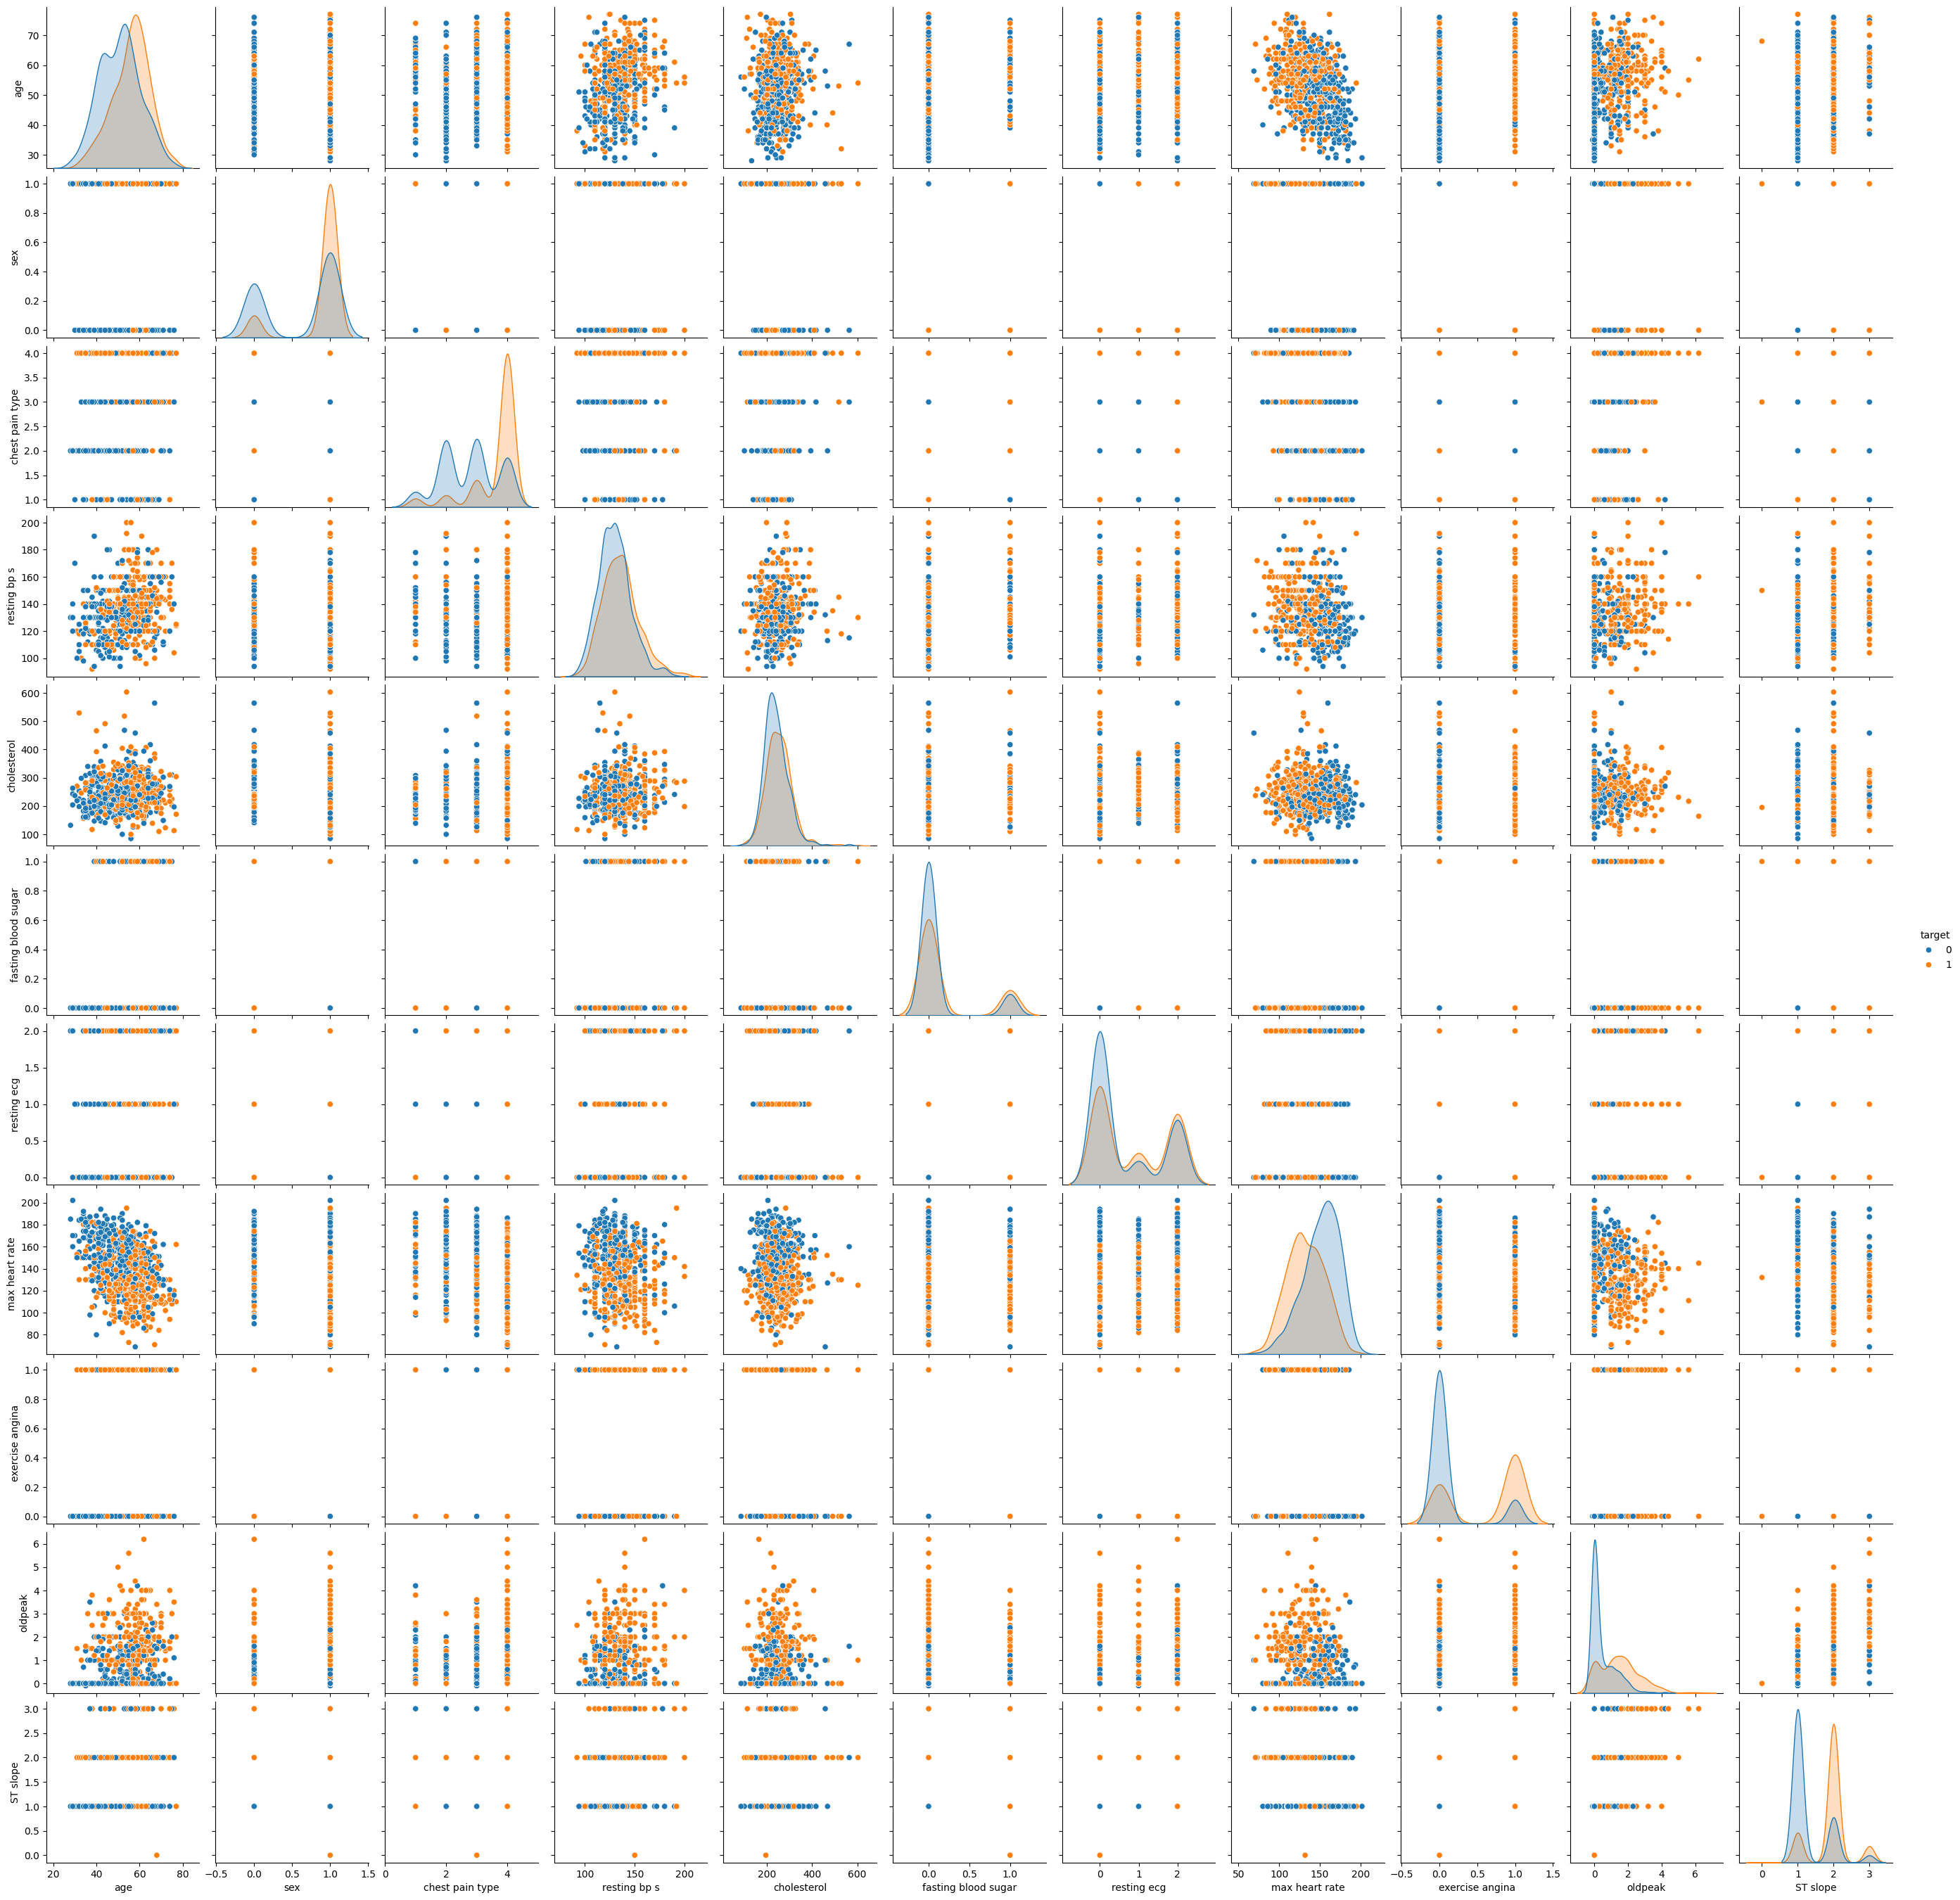

In [21]:
sns.pairplot(df, hue='target')

## Jointplot of Age vs Max Heart Rate

This plot shows the relationship between `age` and `max heart rate` in the dataset. It also uses color to differentiate between people with heart disease and those without, making it easier to see how these two variables are related to the target outcome (heart disease).


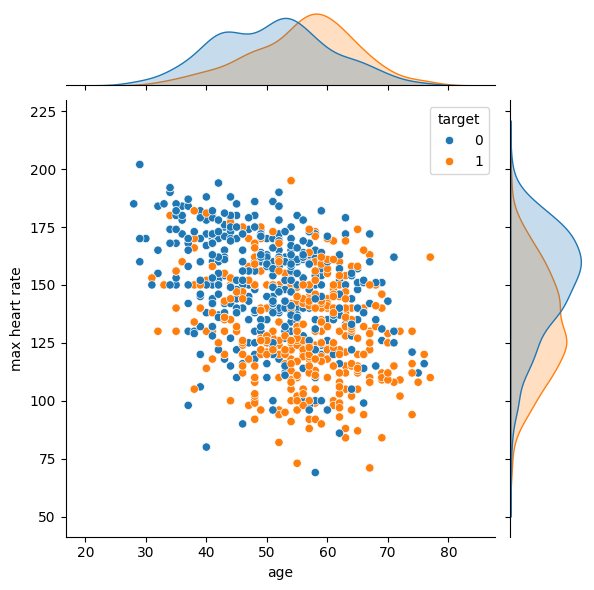

In [22]:
sns.jointplot(x='age', y='max heart rate', data=df, hue='target')

## Countplot of Sex vs Target

This countplot visualizes the distribution of male and female participants (`sex`) in relation to the presence of heart disease (`target`). It helps compare the number of individuals with and without heart disease across both genders.


<Axes: xlabel='sex', ylabel='count'>

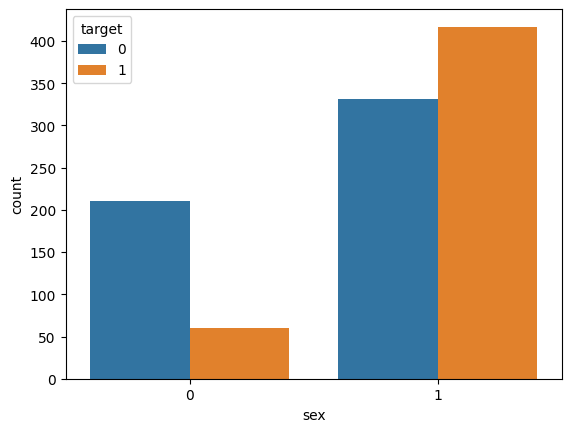

In [23]:
sns.countplot(x='sex', hue='target', data=df)

## Histogram of Cholesterol Levels

This histogram shows the distribution of cholesterol levels, with different colors representing individuals with and without heart disease. The kernel density estimate (KDE) curve highlights the overall distribution of cholesterol values.

<Axes: xlabel='cholesterol', ylabel='Count'>

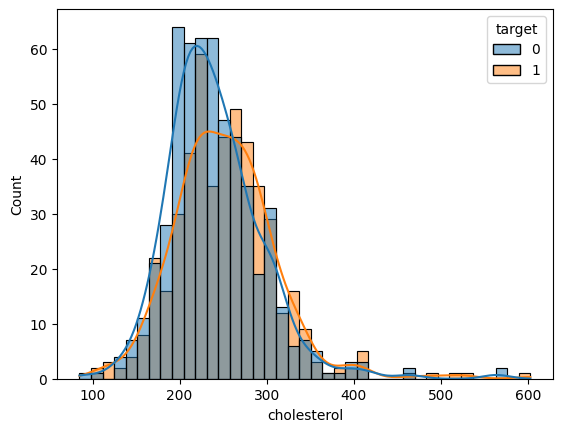

In [24]:
sns.histplot(x='cholesterol', data=df, hue='target', kde=True)

## Bar Chart of Chest Pain Type vs Target

This bar chart shows the distribution of chest pain types across individuals with and without heart disease. The chart is stacked to visualize the proportion of each target class for different chest pain types.

<Axes: ylabel='chest pain type'>

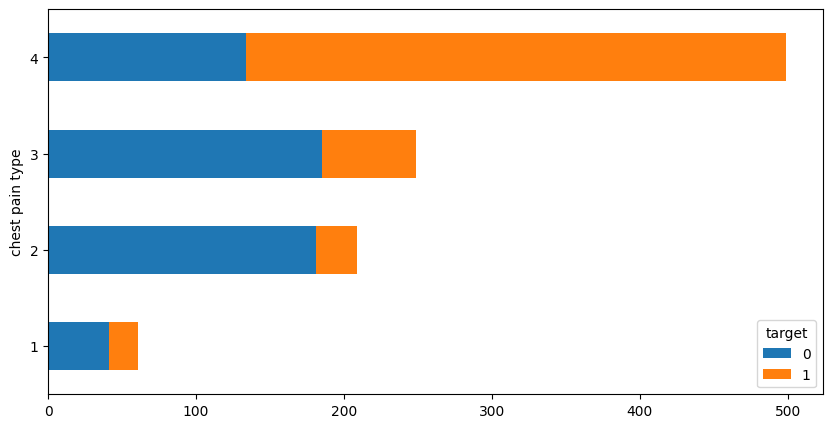

In [25]:
df.groupby(['chest pain type', 'target']).size().unstack(fill_value=0).plot(kind='barh', stacked=True, figsize=(10,5))

## Heatmap of Feature Correlations

This heatmap visualizes the correlation between different features in the dataset. It uses color intensity to show the strength of relationships, helping identify which features are strongly or weakly correlated.

<Axes: >

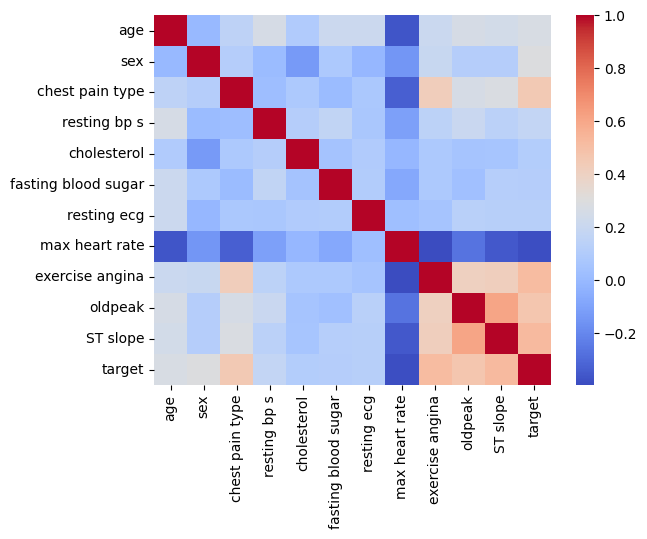

In [26]:
sns.heatmap(df.corr(), cmap='coolwarm')

## Splitting Data into Training and Testing Sets

The dataset is split into features (`X`) and the target variable (`y`). Then, the data is divided into training and testing sets, with 30% of the data used for testing. The random state is set for reproducibility.


In [27]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Logistic Regression Model

A Logistic Regression model is trained using the training data (`X_train`, `y_train`). After fitting the model, it is used to make predictions on the test set (`X_test`), storing the results in `logistic_predict`.


In [28]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

logistic_predict = logistic.predict(X_test)

c:\Users\Hashith Nilanka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluating the Logistic Regression Model

The Logistic Regression model's performance is evaluated using the classification report, which provides metrics like precision, recall, and F1-score. Additionally, a confusion matrix is displayed to show the number of correct and incorrect predictions, helping assess the accuracy of the model.


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, logistic_predict))
pd.DataFrame(confusion_matrix(y_test, logistic_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.84      0.76      0.80       152

    accuracy                           0.81       306
   macro avg       0.81      0.81      0.81       306
weighted avg       0.81      0.81      0.81       306



,0,1
0,132,22
1,37,115


## Training the K-Nearest Neighbors (KNN) Model

A K-Nearest Neighbors (KNN) model is trained using the training data (`X_train`, `y_train`). The model is set to consider the nearest neighbor (`n_neighbors=1`). After fitting the model, it is used to make predictions on the test set (`X_test`), storing the results in `knn_predict`.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

## Evaluating the K-Nearest Neighbors (KNN) Model

The performance of the K-Nearest Neighbors (KNN) model is evaluated using the classification report, which provides metrics such as precision, recall, and F1-score. Additionally, a confusion matrix is displayed to show the number of correct and incorrect predictions, helping to assess the model's accuracy.


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, knn_predict))
pd.DataFrame(confusion_matrix(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       154
           1       0.77      0.75      0.76       152

    accuracy                           0.76       306
   macro avg       0.76      0.76      0.76       306
weighted avg       0.76      0.76      0.76       306



,0,1
0,119,35
1,38,114


## Finding the Optimal Number of Neighbors for KNN

This code evaluates the K-Nearest Neighbors (KNN) model for different values of `n_neighbors` (from 1 to 49) and calculates the error rate for each. The error rates are plotted to help identify the optimal number of neighbors that minimizes the error rate for the model.


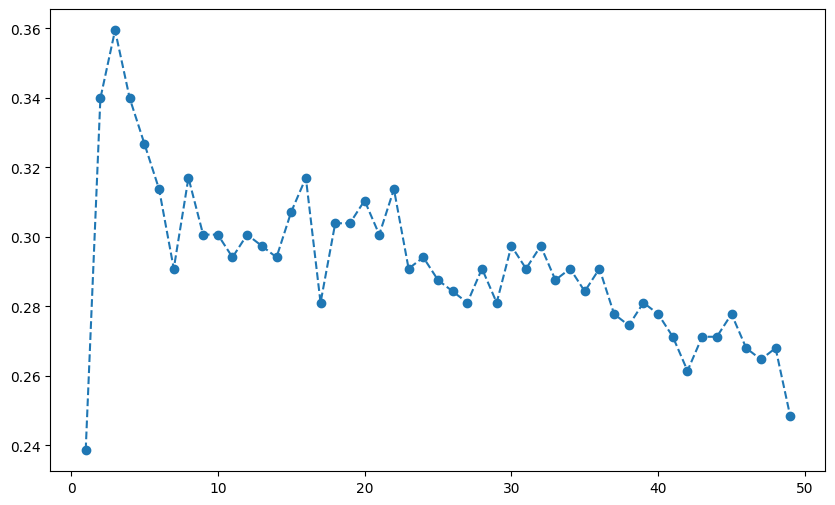

In [32]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append( np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate, ls='--', marker='o' )

After evaluating the K-Nearest Neighbors (KNN) model with different values of `n_neighbors`, the lowest error rate is achieved when `n_neighbors = 1`.

## Training the Decision Tree Model

A Decision Tree model is trained using the training data (`X_train`, `y_train`). After fitting the model, it is used to make predictions on the test set (`X_test`), and the results are stored in `Dtree_predict`.


In [33]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier()

Dtree.fit(X_train, y_train)

Dtree_predict = Dtree.predict(X_test)

## Evaluating the Decision Tree Model

The performance of the Decision Tree model is evaluated using the classification report, which provides metrics such as precision, recall, and F1-score. Additionally, a confusion matrix is displayed to show the number of correct and incorrect predictions, helping to assess the model's accuracy.


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, Dtree_predict))
pd.DataFrame(confusion_matrix(y_test, Dtree_predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       154
           1       0.88      0.85      0.87       152

    accuracy                           0.87       306
   macro avg       0.87      0.87      0.87       306
weighted avg       0.87      0.87      0.87       306



,0,1
0,137,17
1,23,129


## Training the Random Forest Model

A Random Forest model is trained using the training data (`X_train`, `y_train`). The model is configured with 200 trees (`n_estimators=200`). After fitting the model, it is used to make predictions on the test set (`X_test`), and the results are stored in `rfc_predict`.


In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

## Evaluating the Random Forest Model

The performance of the Random Forest model is evaluated using the classification report, which provides metrics such as precision, recall, and F1-score. Additionally, a confusion matrix is displayed to show the number of correct and incorrect predictions, helping assess the accuracy of the model.


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, rfc_predict))
pd.DataFrame(confusion_matrix(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       154
           1       0.92      0.88      0.90       152

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306



,0,1
0,143,11
1,18,134


## Training the Support Vector Classifier (SVC) Model

A Support Vector Classifier (SVC) model is trained using the training data (`X_train`, `y_train`). After fitting the model, it is used to make predictions on the test set (`X_test`), and the results are stored in `svc_predict`.


In [37]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_predict = svc.predict(X_test)

## Evaluating the Support Vector Classifier (SVC) Model

The performance of the Support Vector Classifier (SVC) model is evaluated using the classification report, which provides metrics such as precision, recall, and F1-score. Additionally, a confusion matrix is displayed to show the number of correct and incorrect predictions, helping assess the accuracy of the model.


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, svc_predict))
pd.DataFrame(confusion_matrix(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       154
           1       0.74      0.59      0.65       152

    accuracy                           0.69       306
   macro avg       0.70      0.69      0.69       306
weighted avg       0.70      0.69      0.69       306



,0,1
0,122,32
1,63,89


## Hyperparameter Tuning with GridSearchCV for SVC

GridSearchCV is used to find the best hyperparameters for the Support Vector Classifier (SVC) model. The search is performed over a range of `C` and `gamma` values. After fitting the model, the best combination of hyperparameters is applied, and predictions are made on the test set (`X_test`), stored in `grid_predict`.


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

grid_predict = grid.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.545 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.545 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.545 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.545 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.545 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

## Evaluating the Tuned SVC Model

The performance of the hyperparameter-tuned Support Vector Classifier (SVC) model is evaluated using the classification report, which provides metrics such as precision, recall, and F1-score. Additionally, a confusion matrix is displayed to show the number of correct and incorrect predictions, helping assess the accuracy of the model.


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, grid_predict))
pd.DataFrame(confusion_matrix(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.87      0.75      0.81       152

    accuracy                           0.82       306
   macro avg       0.83      0.82      0.82       306
weighted avg       0.83      0.82      0.82       306



,0,1
0,137,17
1,38,114


## Model Comparison: Accuracy Scores

The accuracy of each model is calculated using the `accuracy_score` function and displayed for comparison. The models being compared are Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Support Vector Machine, and the GridSearchCV-tuned SVC. The accuracy scores are rounded to two decimal places.


In [41]:
from sklearn.metrics import accuracy_score

predict = [logistic_predict, knn_predict, Dtree_predict, rfc_predict, svc_predict, grid_predict]
model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SupportVectorMachine', 'GridSearchCV']

accuracy = []

for pred in predict:
    accuracy.append(round(accuracy_score(y_test,pred),2))

pd.DataFrame(accuracy, model, ['Accuracy Score'])

,Accuracy Score
LogisticRegression,0.81
KNeighborsClassifier,0.76
DecisionTreeClassifier,0.87
RandomForestClassifier,0.91
SupportVectorMachine,0.69
GridSearchCV,0.82


## Conclusion

After evaluating multiple machine learning models to predict heart disease, the Random Forest Classifier emerged as the best performer, providing the highest accuracy. This indicates that it was able to make the most correct predictions compared to other models. The Decision Tree Classifier also delivered good results, performing slightly below Random Forest, but still with a strong level of accuracy.

On the other hand, the Logistic Regression and GridSearchCV models provided moderate results, showing that they are fairly competent but not as effective in this particular dataset. The Support Vector Machine (SVM) had the lowest accuracy, suggesting it might not be the best fit for this problem in its current configuration.

Given these results, the **Random Forest Classifier** is the most reliable model for predicting heart disease in this dataset. It balances accuracy and performance well, making it the recommended model for this project. However, further fine-tuning and testing could potentially improve the performance of other models as well.
